<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Normalized_Spatial_Temporal_GNNDroughtPrediction200k_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
processed_dataset_org = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")

In [ ]:
processed_dataset_org

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,next_month_spei01
0,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,0.000248,0.000000e+00,...,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753,-1.983540
1,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,0.000030,0.000000e+00,...,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415,-0.773948
2,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,0.039828,0.000000e+00,...,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645,1.125420
3,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,0.201599,8.638150e-08,...,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260,0.593335
4,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,0.118411,8.523460e-07,...,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879,0.325884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,0.005088,1.009060e-07,...,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807,0.317675
83576,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,0.019854,3.091570e-07,...,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549,0.585810
83577,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,0.000158,0.000000e+00,...,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490,1.418990
83578,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,0.000038,0.000000e+00,...,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758,0.518092


In [ ]:
processed_dataset_org.describe()


,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,8.358000e+04,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,418.813735,201906.427614,6.426204,18.674333,297.649914,288.751947,307.368306,283.618993,0.053403,0.000054,...,3420.290769,2134.155208,298.576399,2.584283e-05,-0.646818,-0.761360,2018.999282,6.499402,0.151643,-0.646973
std,242.096341,242.792918,17.759911,15.790527,5.733555,6.671234,5.693900,8.848290,0.088575,0.000232,...,2345.066013,1406.945576,5.686335,4.198437e-05,1.343397,1.285446,2.432968,3.389895,0.126393,1.344868
min,0.000000,201505.000000,-33.238000,-17.068000,272.097000,258.898000,281.999000,259.118000,0.000016,0.000000,...,489.180000,326.296000,277.836000,0.000000e+00,-5.000000,-5.000000,2015.000000,1.000000,0.020000,-5.000000
25%,208.000000,201705.000000,-6.288000,8.085000,294.404000,284.604000,303.519750,276.173000,0.000221,0.000000,...,1138.105000,857.004500,295.590000,5.410485e-08,-1.500755,-1.608122,2017.000000,4.000000,0.050233,-1.499347
50%,419.000000,201906.000000,9.881000,20.661000,298.138000,290.355000,307.035500,284.262000,0.006267,0.000000,...,2827.910000,1692.095000,299.064000,3.700365e-06,-0.672251,-0.850191,2019.000000,6.000000,0.107151,-0.671430
75%,628.000000,202107.000000,20.661000,29.644000,301.243000,293.962000,311.563000,291.767250,0.076323,0.000001,...,5490.260000,3268.610000,302.221000,3.568545e-05,0.246571,0.077590,2021.000000,9.000000,0.219935,0.247549
max,837.000000,202308.000000,36.831000,51.204000,313.569000,302.760000,322.431000,298.408000,1.148110,0.006530,...,8742.230000,6458.600000,313.910000,3.350020e-04,5.000000,5.000000,2023.000000,12.000000,0.668410,5.000000


# **Feature Normalization** - Using Min Max Scaler

In [ ]:
from sklearn import preprocessing

processed_dataset_normal = processed_dataset_org.copy()
processed_dataset_normal2=processed_dataset_normal[[ 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01']]
x = processed_dataset_normal2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)

normalized_df.columns = ['Lat_nom', 'Lon_nom','temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01']

horizontal_concat = pd.concat([processed_dataset_normal[['Month','Lat', 'Lon']],normalized_df, processed_dataset_normal[['datetime']]], axis=1)
#horizontal_concat2 = pd.concat([ processed_dataset_normal[['monrh']],horizontal_concat, axis=1)
# view normalized data
display(horizontal_concat)

,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime
0,201505,15.271,-17.068,0.692303,0.0,0.606481,0.747481,0.546819,0.840494,0.000202,...,0.131542,0.715585,0.011756,0.396926,0.406223,0.0,0.363636,0.198567,0.301646,2015-05-01
1,201506,15.271,-17.068,0.692303,0.0,0.636140,0.776709,0.641200,0.876381,0.000012,...,0.128936,0.676776,0.010391,0.301646,0.325223,0.0,0.454545,0.230433,0.422605,2015-06-01
2,201507,15.271,-17.068,0.692303,0.0,0.673732,0.854042,0.564256,0.928099,0.034677,...,0.170026,0.681904,0.042676,0.422605,0.348052,0.0,0.545455,0.323322,0.612542,2015-07-01
3,201508,15.271,-17.068,0.692303,0.0,0.679495,0.872486,0.567867,0.968694,0.175580,...,0.350487,0.719466,0.200239,0.612542,0.517690,0.0,0.636364,0.318101,0.559334,2015-08-01
4,201509,15.271,-17.068,0.692303,0.0,0.683738,0.867813,0.553299,0.976839,0.103123,...,0.411438,0.745080,0.004594,0.559334,0.558803,0.0,0.727273,0.209557,0.532588,2015-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,202304,11.678,51.204,0.641025,1.0,0.668813,0.806416,0.599871,0.885136,0.004417,...,0.158925,0.722376,0.005127,0.643295,0.533441,1.0,0.272727,0.197108,0.531767,2023-04-01
83576,202305,11.678,51.204,0.641025,1.0,0.706766,0.808353,0.624060,0.920031,0.017279,...,0.144162,0.772884,0.001334,0.531767,0.561051,1.0,0.363636,0.196710,0.558581,2023-05-01
83577,202306,11.678,51.204,0.641025,1.0,0.743538,0.865100,0.675925,0.848435,0.000123,...,0.133388,0.761740,0.000101,0.558581,0.594758,1.0,0.454545,0.195077,0.641899,2023-06-01
83578,202307,11.678,51.204,0.641025,1.0,0.770038,0.918836,0.691309,0.790252,0.000019,...,0.116908,0.715391,0.012195,0.641899,0.583324,1.0,0.545455,0.198575,0.551809,2023-07-01


In [ ]:
processed_dataset=horizontal_concat

processed_dataset.describe()

,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,201906.427614,6.426204,18.674333,0.566073,0.523528,0.616149,0.680634,0.627456,0.623594,0.046500,...,0.355155,0.294809,0.574940,0.077142,0.435318,0.423864,0.499910,0.499946,0.203024,0.435303
std,242.792918,17.759911,15.790527,0.253463,0.231288,0.138251,0.152096,0.140827,0.225205,0.077150,...,0.284145,0.229432,0.157630,0.125326,0.134340,0.128545,0.304121,0.308172,0.194927,0.134487
min,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201705.000000,-6.288000,8.085000,0.384621,0.368423,0.537881,0.586065,0.532270,0.434080,0.000178,...,0.078629,0.086543,0.492155,0.000162,0.349924,0.339188,0.250000,0.272727,0.046626,0.350065
50%,201906.000000,9.881000,20.661000,0.615379,0.552628,0.627918,0.717181,0.619225,0.639959,0.005444,...,0.283378,0.222722,0.588457,0.011046,0.432775,0.414981,0.500000,0.454545,0.134407,0.432857
75%,202107.000000,20.661000,29.644000,0.769227,0.684204,0.702787,0.799416,0.731203,0.830981,0.066464,...,0.605967,0.479806,0.675972,0.106523,0.524657,0.507759,0.750000,0.727273,0.308346,0.524755
max,202308.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
display(processed_dataset)

,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime
0,201505,15.271,-17.068,0.692303,0.0,0.606481,0.747481,0.546819,0.840494,0.000202,...,0.131542,0.715585,0.011756,0.396926,0.406223,0.0,0.363636,0.198567,0.301646,2015-05-01
1,201506,15.271,-17.068,0.692303,0.0,0.636140,0.776709,0.641200,0.876381,0.000012,...,0.128936,0.676776,0.010391,0.301646,0.325223,0.0,0.454545,0.230433,0.422605,2015-06-01
2,201507,15.271,-17.068,0.692303,0.0,0.673732,0.854042,0.564256,0.928099,0.034677,...,0.170026,0.681904,0.042676,0.422605,0.348052,0.0,0.545455,0.323322,0.612542,2015-07-01
3,201508,15.271,-17.068,0.692303,0.0,0.679495,0.872486,0.567867,0.968694,0.175580,...,0.350487,0.719466,0.200239,0.612542,0.517690,0.0,0.636364,0.318101,0.559334,2015-08-01
4,201509,15.271,-17.068,0.692303,0.0,0.683738,0.867813,0.553299,0.976839,0.103123,...,0.411438,0.745080,0.004594,0.559334,0.558803,0.0,0.727273,0.209557,0.532588,2015-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,202304,11.678,51.204,0.641025,1.0,0.668813,0.806416,0.599871,0.885136,0.004417,...,0.158925,0.722376,0.005127,0.643295,0.533441,1.0,0.272727,0.197108,0.531767,2023-04-01
83576,202305,11.678,51.204,0.641025,1.0,0.706766,0.808353,0.624060,0.920031,0.017279,...,0.144162,0.772884,0.001334,0.531767,0.561051,1.0,0.363636,0.196710,0.558581,2023-05-01
83577,202306,11.678,51.204,0.641025,1.0,0.743538,0.865100,0.675925,0.848435,0.000123,...,0.133388,0.761740,0.000101,0.558581,0.594758,1.0,0.454545,0.195077,0.641899,2023-06-01
83578,202307,11.678,51.204,0.641025,1.0,0.770038,0.918836,0.691309,0.790252,0.000019,...,0.116908,0.715391,0.012195,0.641899,0.583324,1.0,0.545455,0.198575,0.551809,2023-07-01


In [ ]:
processed_dataset.to_csv('/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag_normalizedV1.csv', sep=',', encoding='utf-8', header='true')

In [ ]:
processed_dataset=pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag_normalizedV1.csv")
processed_dataset.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,41789.500000,201906.427614,6.426204,18.674333,0.566073,0.523528,0.616149,0.680634,0.627456,0.623594,...,0.355155,0.294809,0.574940,0.077142,0.435318,0.423864,0.499910,0.499946,0.203024,0.435303
std,24127.612087,242.792918,17.759911,15.790527,0.253463,0.231288,0.138251,0.152096,0.140827,0.225205,...,0.284145,0.229432,0.157630,0.125326,0.134340,0.128545,0.304121,0.308172,0.194927,0.134487
min,0.000000,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20894.750000,201705.000000,-6.288000,8.085000,0.384621,0.368423,0.537881,0.586065,0.532270,0.434080,...,0.078629,0.086543,0.492155,0.000162,0.349924,0.339188,0.250000,0.272727,0.046626,0.350065
50%,41789.500000,201906.000000,9.881000,20.661000,0.615379,0.552628,0.627918,0.717181,0.619225,0.639959,...,0.283378,0.222722,0.588457,0.011046,0.432775,0.414981,0.500000,0.454545,0.134407,0.432857
75%,62684.250000,202107.000000,20.661000,29.644000,0.769227,0.684204,0.702787,0.799416,0.731203,0.830981,...,0.605967,0.479806,0.675972,0.106523,0.524657,0.507759,0.750000,0.727273,0.308346,0.524755
max,83579.000000,202308.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import networkx as nx
from geopy.distance import geodesic

In [ ]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime
36896,36896,201505,-33.238,18.865,0.0,0.526321,0.398172,0.485135,0.527923,0.593484,...,0.204301,0.197233,0.106377,0.435383,0.357744,0.0,0.363636,0.356693,0.564221,2015-05-01
40496,40496,201505,-33.238,20.661,0.0,0.552628,0.349754,0.418038,0.437228,0.444897,...,0.120505,0.167129,0.051331,0.493988,0.428312,0.0,0.363636,0.289999,0.746059,2015-05-01
44196,44196,201505,-33.238,22.458,0.0,0.578949,0.375193,0.422256,0.457385,0.470960,...,0.133445,0.172479,0.068831,0.460426,0.480249,0.0,0.363636,0.334359,0.689636,2015-05-01
47996,47996,201505,-33.238,24.255,0.0,0.605270,0.389299,0.458894,0.511773,0.493153,...,0.184492,0.188169,0.071556,0.496584,0.604930,0.0,0.363636,0.280466,0.643318,2015-05-01
51696,51696,201505,-33.238,26.051,0.0,0.631577,0.398992,0.463682,0.522853,0.573683,...,0.407857,0.258191,0.101502,0.422760,0.559692,0.0,0.363636,0.332310,0.627903,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,202308,36.831,2.695,1.0,0.289474,0.667945,0.756691,0.643748,0.852634,...,0.171166,0.621888,0.130777,0.199253,0.271646,1.0,0.636364,0.124452,0.390657,2023-08-01
18598,18598,202308,36.831,4.492,1.0,0.315796,0.647545,0.728672,0.660986,0.788369,...,0.183406,0.610772,0.091340,0.238931,0.303782,1.0,0.636364,0.224663,0.322575,2023-08-01
20498,20498,202308,36.831,6.288,1.0,0.342102,0.653019,0.717706,0.701103,0.789488,...,0.221102,0.603232,0.081882,0.234256,0.384567,1.0,0.636364,0.213737,0.305495,2023-08-01
22398,22398,202308,36.831,8.085,1.0,0.368423,0.668234,0.745839,0.794890,0.796946,...,0.192887,0.609275,0.068997,0.350369,0.368890,1.0,0.636364,0.220538,0.282792,2023-08-01


In [ ]:
sort_processed_dataset["row_index"] = sort_processed_dataset.index

In [ ]:
sort_processed_dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'Lat_nom', 'Lon_nom',
       'temperature_2m', 'temperature_2m_min', 'temperature_2m_max',
       'dewpoint_temperature_2m', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'u_component_of_wind_10m', 'v_component_of_wind_10m',
       'surface_net_solar_radiation_sum', 'total_evaporation_sum',
       'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI',
       'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01', 'datetime', 'row_index'],
      dtype='object')

**Spatial-Temporal Graph**

In [ ]:
Spatial_temporal_graph = nx.Graph()

In [ ]:
# Add nodes with features
for index, row in sort_processed_dataset.iterrows():
    Spatial_temporal_graph.add_node(index, **row[["row_index","Month",'Lat', 'Lon',  'Lat_nom', 'Lon_nom','temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01', "next_month_soil_moisture_am", "next_month_spei01"]].to_dict())

print("finished creating node features")

finished creating node features


In [ ]:
unique_list_of_months = list(set(sort_processed_dataset["Month"]))
unique_list_of_months.sort()
unique_list_of_months

[201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211,
 202212,
 202301,
 202302,
 202303,
 202304,
 202305,
 202306,
 202307,
 202308]

**Distance-Based Spatial Graph**

In [ ]:
from scipy.spatial import KDTree
total_index=0
diff=1

for month in unique_list_of_months:
    dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    print("\n!!!!!!!!!!CURRENT MONTH!",month)
    # Create a KDTree for efficient spatial queries
    tree = KDTree(dataset_subset[['Lat', 'Lon']])

    # Iterate through each row in the dataset
    for i, row in dataset_subset.iterrows():
        # Query the tree for points within 3 units
        indices = tree.query_ball_point([row['Lat'], row['Lon']], 3)
        i_Spei=row['spei01']
     #   print("Current row I ",i," Lat and Lon ",row['Lat'],row['Lon']," with SPEI ", i_Spei)
        # Add edges to the graph
        for j in indices:
            j_row_index = sort_processed_dataset.iloc[total_index + j]["row_index"]
            j_month=sort_processed_dataset.iloc[total_index + j]["Month"]
            j_Lat=sort_processed_dataset.iloc[total_index + j]["Lat"]
            j_Lon=sort_processed_dataset.iloc[total_index + j]["Lon"]
            j_Spei=sort_processed_dataset.iloc[total_index + j]["spei01"]
            speiDiff=abs(i_Spei - j_Spei)
           # print("Adjacent row J ", j_row_index, "of Month" , j_month, " Lat and Lon", j_Lat,j_Lon, " with SPEI ", j_Spei)
            if i != j_row_index:  # Avoid adding self-loops
                if  speiDiff < diff:
                  Spatial_temporal_graph.add_edge(i, j_row_index)
                  print("Edge Added: "+str(i)+", "+str(j_row_index))

    total_index += len(dataset_subset)

    print("nodes processed: " + str(total_index))

Streaming output truncated to the last 5000 lines.
Edge Added: 63795, 60295
Edge Added: 63795, 66994
Edge Added: 63795, 67094
Edge Added: 63795, 67194
Edge Added: 63795, 60395
Edge Added: 63795, 63895
Edge Added: 67094, 63695
Edge Added: 67094, 63795
Edge Added: 67094, 66994
Edge Added: 67094, 70192
Edge Added: 67094, 70292
Edge Added: 67094, 67194
Edge Added: 67094, 63895
Edge Added: 67094, 70392
Edge Added: 70292, 66994
Edge Added: 70292, 70192
Edge Added: 70292, 72992
Edge Added: 70292, 73091
Edge Added: 70292, 67094
Edge Added: 70292, 67194
Edge Added: 70292, 70392
Edge Added: 70292, 73190
Edge Added: 73091, 70192
Edge Added: 73091, 72992
Edge Added: 73091, 70292
Edge Added: 73091, 75388
Edge Added: 73091, 75288
Edge Added: 73091, 70392
Edge Added: 73091, 73190
Edge Added: 73091, 75488
Edge Added: 75388, 72992
Edge Added: 75388, 73091
Edge Added: 75388, 77284
Edge Added: 75388, 75288
Edge Added: 75388, 77184
Edge Added: 75388, 73190
Edge Added: 75388, 77384
Edge Added: 75388, 75488

In [ ]:
lat = [35.034 , 35.034 , 36.831 , 36.831, 36.831 , 35.034  ]
lon = [6.288, 8.085, 6.288, 8.085,9.881,9.881]
n=[1,2,3,4,5,6]

# dictionary of lists
dict = {'lat': lat, 'lon': lon}

df = pd.DataFrame(dict)

print(df)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=df['lon'], y=df['lat'])

for i, txt in enumerate(n):
    ax.annotate(txt, (lon[i], lat[i]))
plt.show()

<ipython-input-34-da336d85f8ef>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


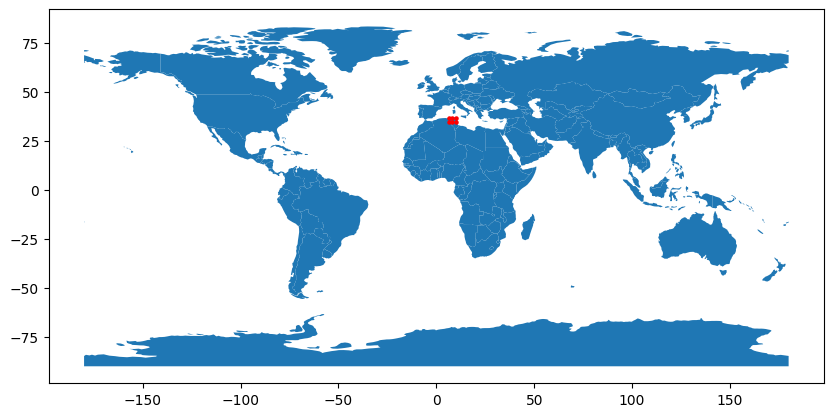

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=5);

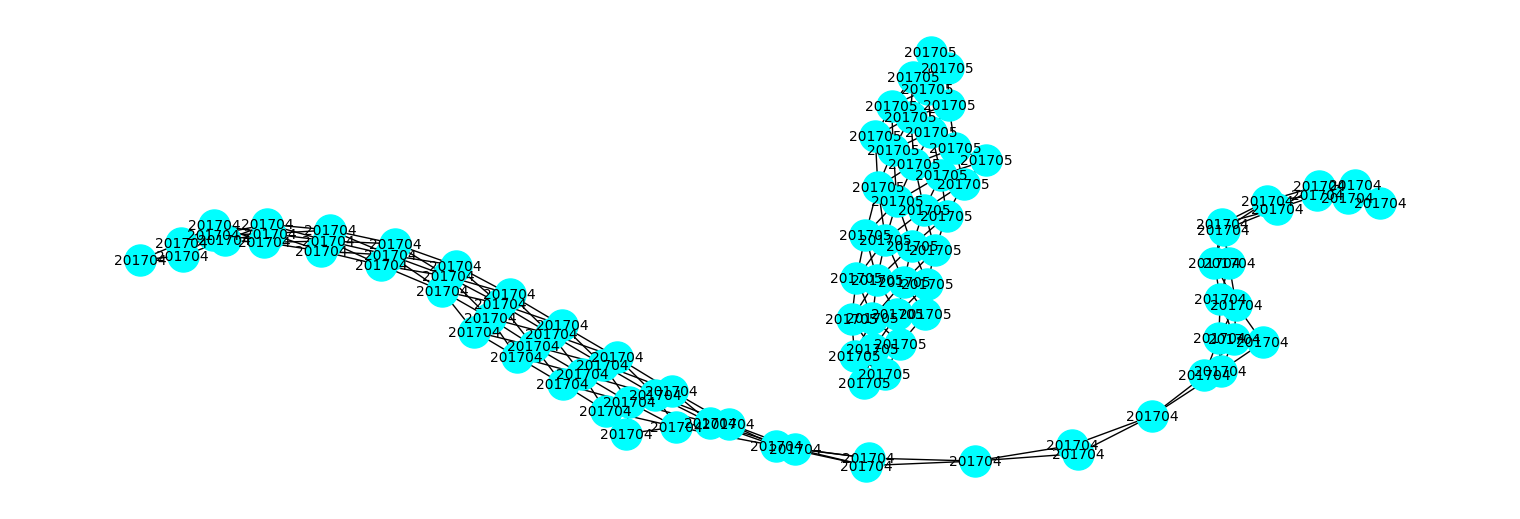

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 20000, 20100, "Month")

# **Create temporal edges - between consective monthes in the same season**

In [ ]:
def sameSeason(currentM, nextM):
  winter=[12,1,2]
  spring=[3,4,5]
  summer=[6,7,8]
  fall=[9,10,11]

  cM=int(currentM[4:])
  nM=int(nextM[4:])
  print(cM,nM)

  if cM in winter and nM in winter:
    return True
  else:
    if cM in spring and nM in spring:
      return True
    else:
      if cM in summer and nM in summer:
        return True
      else:
        if cM in fall and nM in fall:
          return True
        else:
          return False

In [ ]:
print(sameSeason("201501", "201512"))
print(sameSeason("201506", "201509"))


1 12
True
6 9
False


In [ ]:
#More Efficient Version

total_index = 0

diffm=1



for i, month in enumerate(unique_list_of_months[:-1]):
    # Get the dataset for the current month and the next month
    dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]
    print("current month ", unique_list_of_months[i], " next month ",unique_list_of_months[i+1])

    if sameSeason(str(unique_list_of_months[i]),str(unique_list_of_months[i+1])):

     # Create dictionaries for the coordinates
      coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
      coords_dict_2 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_2.iterrows()}

     # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
      for coord, idx1 in coords_dict_1.items():
         idx1_Spei=dataset_subset_1[dataset_subset_1["row_index"] == idx1].iloc[0]['spei01']
      #    print("idx1", idx1, " SPEI01 ", idx1_Spei);
         idx2 = coords_dict_2.get(coord)
         if idx2 is not None:
             idx2_Spei=dataset_subset_2[dataset_subset_2["row_index"] == idx2].iloc[0]['spei01']
          #   print("idx2", idx2, " SPEI01 ", idx2_Spei);
             speiDiff= abs(idx1_Spei-idx2_Spei)
             if speiDiff<diffm :
               Spatial_temporal_graph.add_edge(idx1, idx2)
               print("add Temporal edges with node ", idx1 ," and next month Node ", idx2)
               print("")

    # Update and print the processed count
      total_index += len(dataset_subset_1)
      print("nodes processed: " + str(total_index))

Streaming output truncated to the last 5000 lines.

add Temporal edges with node  33491  and next month Node  33492

add Temporal edges with node  37191  and next month Node  37192

add Temporal edges with node  40791  and next month Node  40792

add Temporal edges with node  44491  and next month Node  44492

add Temporal edges with node  48291  and next month Node  48292

add Temporal edges with node  51991  and next month Node  51992

add Temporal edges with node  55691  and next month Node  55692

add Temporal edges with node  59291  and next month Node  59292

add Temporal edges with node  62791  and next month Node  62792

add Temporal edges with node  30091  and next month Node  30092

add Temporal edges with node  33591  and next month Node  33592

add Temporal edges with node  37291  and next month Node  37292

add Temporal edges with node  40891  and next month Node  40892

add Temporal edges with node  44591  and next month Node  44592

add Temporal edges with node  48391  a

In [ ]:
row1 = sort_processed_dataset[sort_processed_dataset["row_index"] == 4715]
display(row1)

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime,row_index
4715,4715,201608,4.492,-8.085,0.538469,0.131577,0.619261,0.837604,0.480337,0.91382,...,0.599712,0.233928,0.584923,0.565931,0.125,0.636364,0.511022,0.578787,2016-08-01,4715


In [ ]:
row2 = sort_processed_dataset[sort_processed_dataset["row_index"] == 4799]
display(row2)

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime,row_index
4799,4799,202308,4.492,-8.085,0.538469,0.131577,0.629123,0.84246,0.483874,0.927895,...,0.610467,0.117995,0.659666,0.665221,1.0,0.636364,0.580663,0.582456,2023-08-01,4799


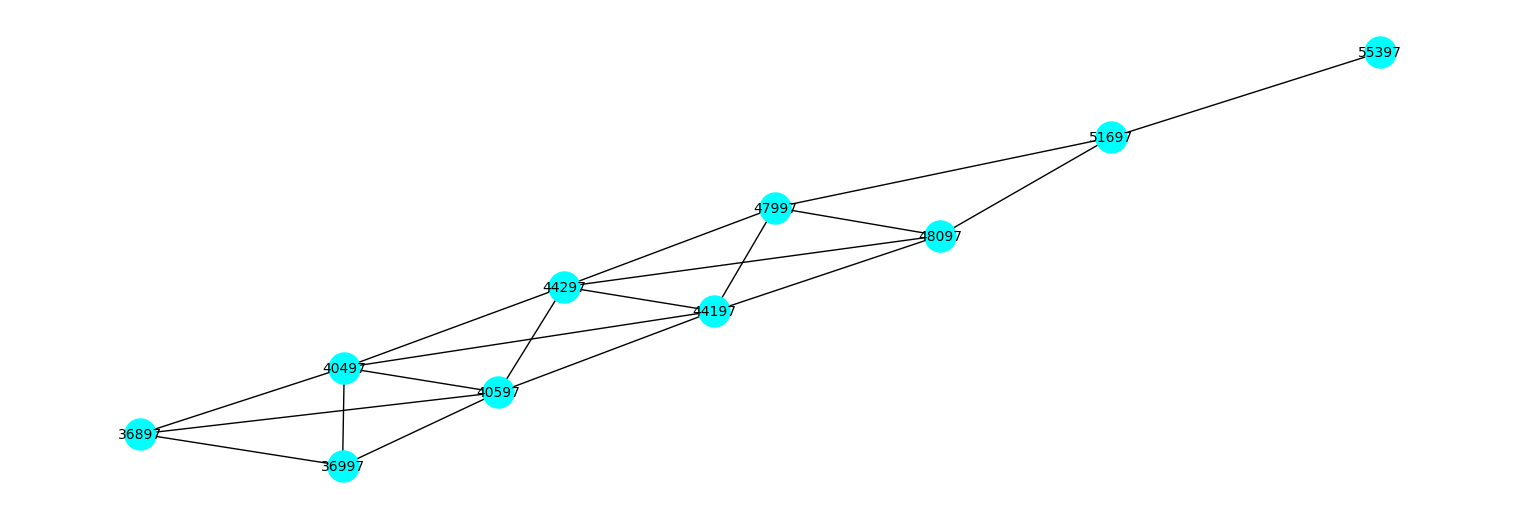

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 836, 846, "row_index")

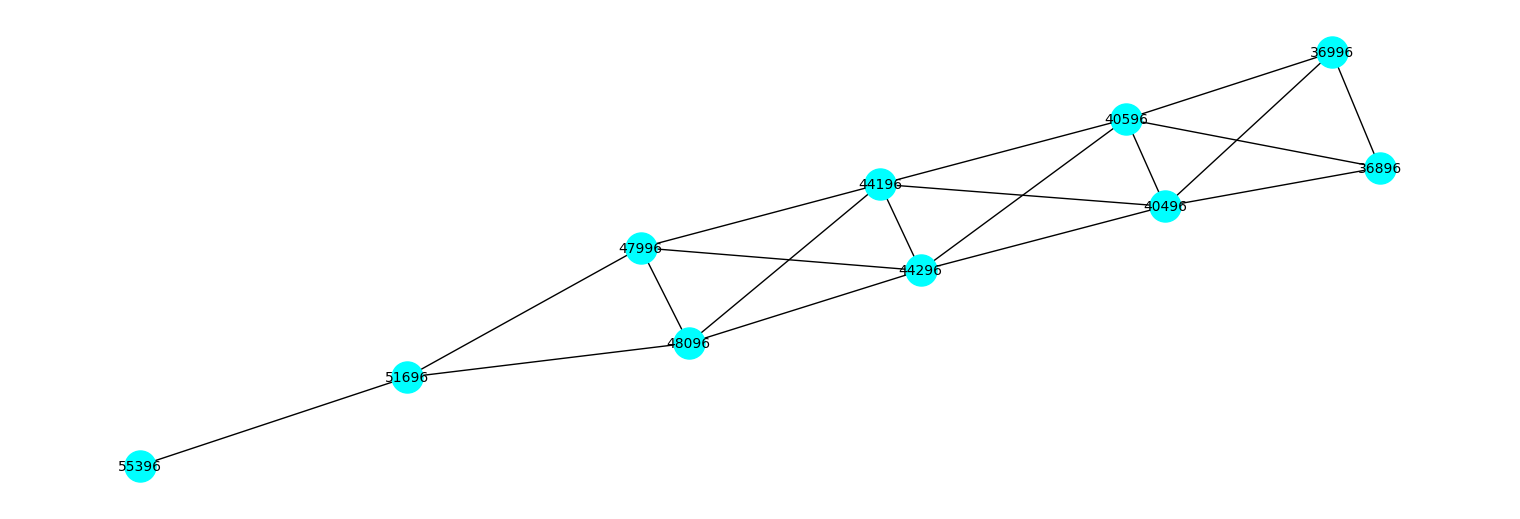

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

## **Create temporal edges - between years of the same Month**


In [ ]:
list_of_months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
list_of_years=["2015","2016","2017","2018","2019","2020","2021","2022","2023"]
diffy=1
for m, month in enumerate(list_of_months):
    for y, year in enumerate(list_of_years[:-1]):
    # Get the dataset for the current year of the month and the next year
      currentYearMonth = float(year+month)
      nextYearMonth = float(list_of_years[y+1]+month)
      dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == currentYearMonth]
      dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == nextYearMonth]
      print("current year month ", currentYearMonth, " next year month ",nextYearMonth)


  	# Create dictionaries for the coordinates
      coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
      coords_dict_2 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_2.iterrows()}


    # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
      if coords_dict_1  is not None:
        for coord, idx1 in coords_dict_1.items():
          idx1_Spei=dataset_subset_1[dataset_subset_1["row_index"] == idx1].iloc[0]['spei01']
          #print("idx1", idx1, " SPEI01 ", idx1_Spei);
          if coords_dict_2 is not None:
            idx2 = coords_dict_2.get(coord)
            if idx2 is not None:
               idx2_Spei=dataset_subset_2[dataset_subset_2["row_index"] == idx2].iloc[0]['spei01']
               #print("idx2", idx2, " SPEI01 ", idx2_Spei);
               speiDiff= abs(idx1_Spei-idx2_Spei)
               if speiDiff<diffy :
                  Spatial_temporal_graph.add_edge(idx1, idx2)
                  print("add Temporal edges with node ", idx1 ," and next year Node ", idx2)
                  print("")
      # Update and print the processed count
      total_index += len(dataset_subset_1)
      print("nodes processed: " + str(total_index))

Streaming output truncated to the last 5000 lines.

add Temporal edges with node  59151  and next year Node  59163

add Temporal edges with node  33451  and next year Node  33463

add Temporal edges with node  37151  and next year Node  37163

add Temporal edges with node  40751  and next year Node  40763

add Temporal edges with node  44451  and next year Node  44463

add Temporal edges with node  48251  and next year Node  48263

add Temporal edges with node  51951  and next year Node  51963

add Temporal edges with node  55651  and next year Node  55663

add Temporal edges with node  59251  and next year Node  59263

add Temporal edges with node  62751  and next year Node  62763

add Temporal edges with node  30051  and next year Node  30063

add Temporal edges with node  33551  and next year Node  33563

add Temporal edges with node  37251  and next year Node  37263

add Temporal edges with node  40851  and next year Node  40863

add Temporal edges with node  44551  and next year N

In [ ]:
row1 = sort_processed_dataset[sort_processed_dataset["row_index"] == 58975  ]
display(row1)

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime,row_index
58975,58975,202112,29.644,27.848,0.89743,0.657898,0.355758,0.428959,0.332534,0.519827,...,0.265482,0.000467,0.585803,0.435282,0.75,1.0,0.152478,0.622285,2021-12-01,58975


In [ ]:
row2 = sort_processed_dataset[sort_processed_dataset["row_index"] == 58987  ]
display(row2)

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime,row_index
58987,58987,202212,29.644,27.848,0.89743,0.657898,0.423274,0.494939,0.395182,0.571392,...,0.252426,0.000244,0.283917,0.408811,0.875,1.0,0.086983,0.341775,2022-12-01,58987


**Create 3 month temporal edges - Deprecated**

In [ ]:
total_index = 0

for i, month in enumerate(unique_list_of_months[:-2]):
    # Get the dataset for the current month and the next month
    dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    dataset_subset_3 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+2]]

    # Create dictionaries for the coordinates
    coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
    coords_dict_3 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_3.iterrows()}

    # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
    for coord, idx1 in coords_dict_1.items():
        idx2 = coords_dict_3.get(coord)
        if idx2 is not None:
            Spatial_temporal_graph.add_edge(idx1, idx2)

    # Update and print the processed count
    total_index += len(dataset_subset_1)
    print("nodes processed: " + str(total_index))

nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
nodes processed: 36784


In [ ]:
list(Spatial_temporal_graph.edges())[0:3000]

[(36896, 36996),
 (36896, 40496),
 (36896, 40596),
 (36896, 36897),
 (36896, 36898),
 (40496, 36996),
 (40496, 44196),
 (40496, 44296),
 (40496, 40596),
 (40496, 40497),
 (40496, 40498),
 (44196, 48096),
 (44196, 44296),
 (44196, 47996),
 (44196, 40596),
 (44196, 44197),
 (44196, 44198),
 (47996, 48096),
 (47996, 44296),
 (47996, 51796),
 (47996, 51696),
 (47996, 47997),
 (47996, 47998),
 (51696, 48096),
 (51696, 55496),
 (51696, 55396),
 (51696, 51796),
 (51696, 51697),
 (51696, 51698),
 (55396, 55496),
 (55396, 59096),
 (55396, 51796),
 (55396, 55397),
 (55396, 55398),
 (36996, 37096),
 (36996, 33396),
 (36996, 40596),
 (36996, 40696),
 (36996, 36997),
 (36996, 36998),
 (40596, 37096),
 (40596, 44296),
 (40596, 40696),
 (40596, 44396),
 (40596, 40597),
 (40596, 40598),
 (44296, 48096),
 (44296, 40696),
 (44296, 48196),
 (44296, 44396),
 (44296, 44297),
 (44296, 44298),
 (48096, 48196),
 (48096, 44396),
 (48096, 51796),
 (48096, 51896),
 (48096, 48097),
 (48096, 48098),
 (51796, 48196

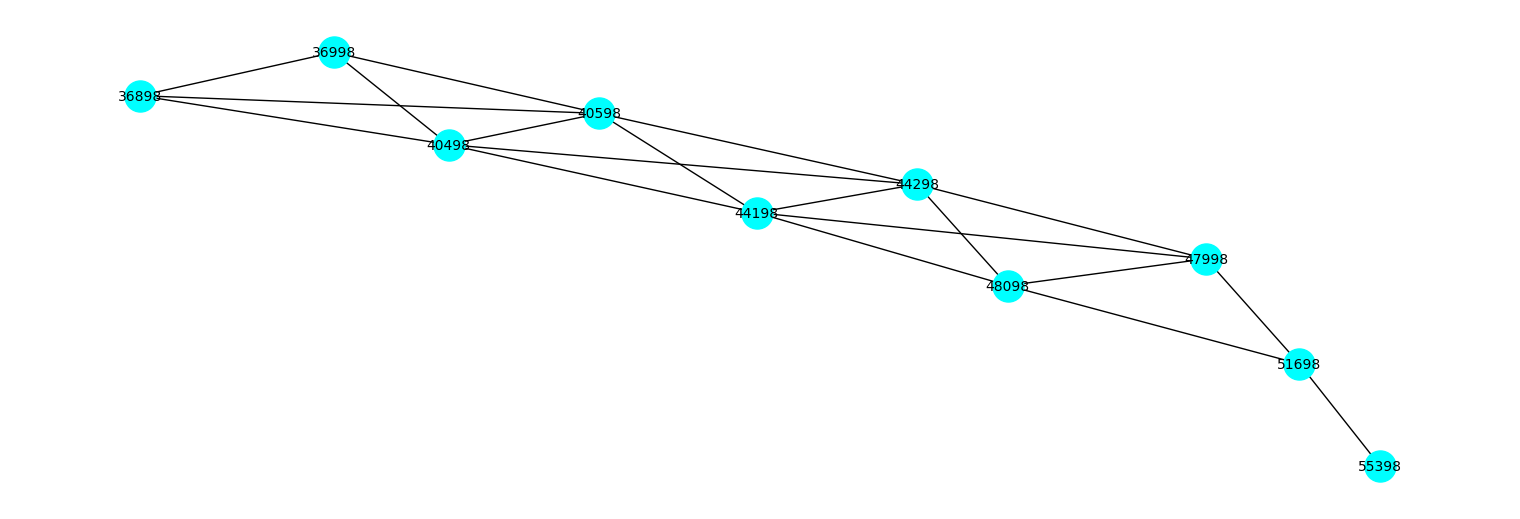

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 1672, 1682, "row_index")

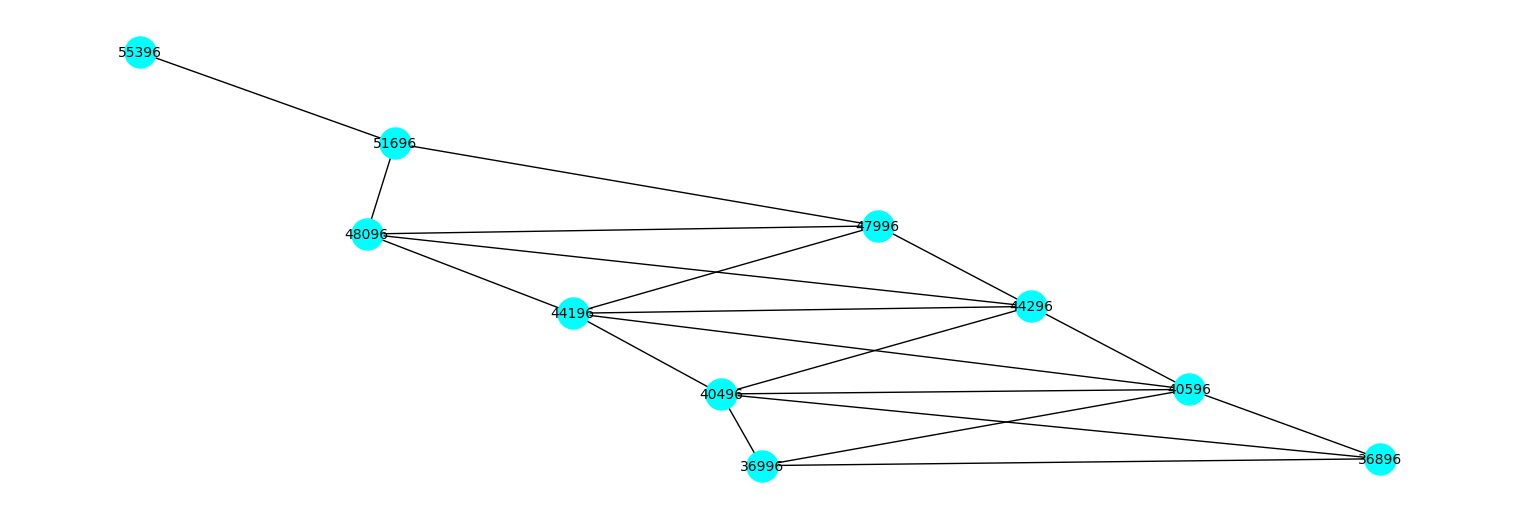

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

**Save Graph**

In [ ]:
import pickle

# save graph object to file
pickle.dump(Spatial_temporal_graph, open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedV1.pickle', 'wb'))


In [ ]:

# load graph object from file
Graph = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedV1.pickle', 'rb'))

**Graph Display and Test**

In [ ]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

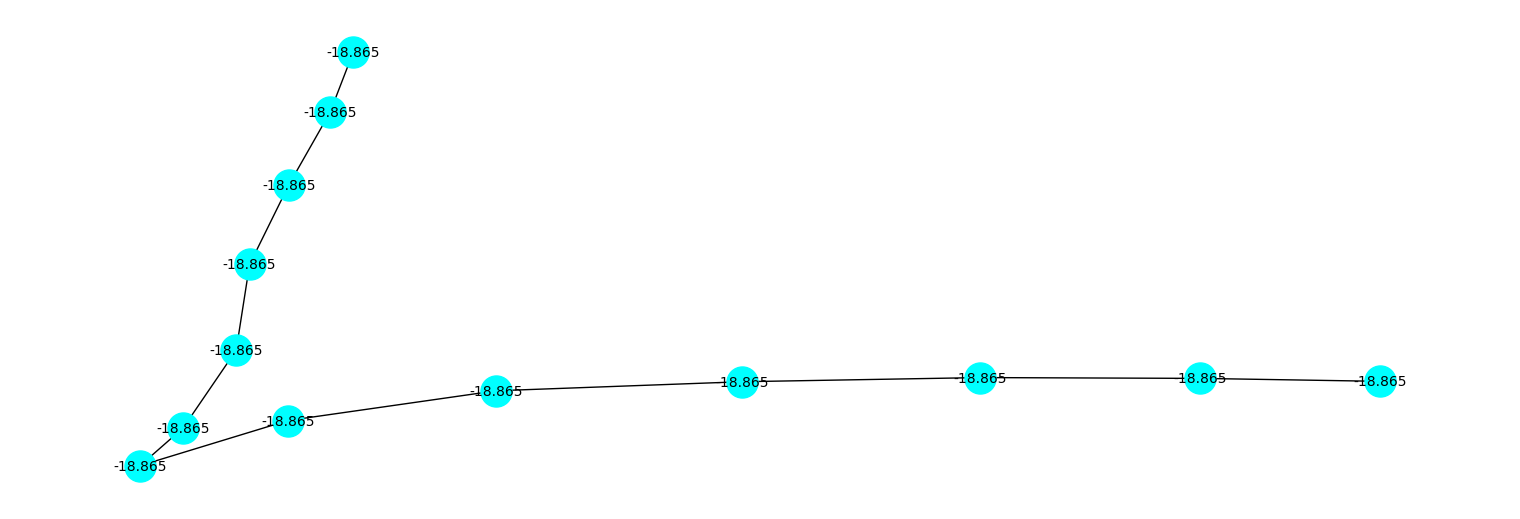

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 90, 103, "Lat")

In [ ]:
#Access node attibutes for the 80th node
Spatial_temporal_graph.nodes[list(Spatial_temporal_graph.nodes())[80]]

{'row_index': 52396,
 'Month': 201505,
 'Lat': -20.661,
 'Lon': 26.051,
 'Lat_nom': 0.1794944982802665,
 'Lon_nom': 0.6315766346379188,
 'temperature_2m': 0.5362895447530871,
 'temperature_2m_min': 0.6666134695180341,
 'temperature_2m_max': 0.4709635931935096,
 'dewpoint_temperature_2m': 0.6398065665563752,
 'total_precipitation_sum': 4.197888979301165e-05,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.0001239348777246,
 'u_component_of_wind_10m': 0.3156139509781005,
 'v_component_of_wind_10m': 0.4649815711718297,
 'surface_net_solar_radiation_sum': 0.5658021482706602,
 'total_evaporation_sum': 0.6078474348178262,
 'soil_moisture_am': 0.1251060285930198,
 'soil_moisture_pm': 0.1347255041185762,
 'NDVI': 0.4128594883103823,
 'EVI': 0.3085730909622223,
 'next_month_tempreature': 0.3147141985917843,
 'next_month_precipitation': 0.0088728425501937,
 'year': 0.0,
 'month2': 0.3636363636363636,
 'spei01': 0.2454369999999999,
 'next_month_soil_moisture_am': 0.1093923597723662